## In this project, I am attempting to predict home value using a Kaggle "Housing Prices Competition" dataset.

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows', None)
rs = 33

In [2]:
#Getting a quick overview of the dataset using the exploretransform package.
import exploretransform as et
et.peek(df)

,variable,dtype,lvls,obs,head
0,Id,int64,1460,1460,"[1, 2, 3, 4, 5]"
1,MSSubClass,int64,15,1460,"[60, 20, 60, 70, 60]"
2,MSZoning,object,5,1460,"[RL, RL, RL, RL, RL]"
3,LotFrontage,float64,110,1460,"[65.0, 80.0, 68.0, 60.0, 84.0]"
4,LotArea,int64,1073,1460,"[8450, 9600, 11250, 9550, 14260]"
5,Street,object,2,1460,"[Pave, Pave, Pave, Pave, Pave]"
6,Alley,object,2,1460,"[nan, nan, nan, nan, nan]"
7,LotShape,object,4,1460,"[Reg, Reg, IR1, IR1, IR1]"
8,LandContour,object,4,1460,"[Lvl, Lvl, Lvl, Lvl, Lvl]"
9,Utilities,object,2,1460,"[AllPub, AllPub, AllPub, AllPub, AllPub]"


## Since there are some 'nan' values in the data, I should begin by dealing with the missing values.

In [3]:
import numpy as np

# Inspect Missing Values
def report_missing_data(df):
   
    missing_count_per_column = df.isnull().sum()
    missing_count_per_column = missing_count_per_column[missing_count_per_column>0]
    total_count_per_column = df.isnull().count()
    total_cells = np.product(df.shape)
    
    # Percent calculation
    percent_per_columnn = 100*missing_count_per_column/total_count_per_column
    percent_of_total = 100*missing_count_per_column/total_cells
    
    # Creating new dataframe for reporting purposes only
    missing_data = pd.concat([missing_count_per_column,
                              percent_per_columnn,
                              percent_of_total], axis=1, keys=['Total_Missing', 'Percent_per_column','Percent_of_total'])
    
    
    missing_data = missing_data.dropna()
    missing_data.index.names = ['Feature']
    missing_data.reset_index(inplace=True)

    
    
    return missing_data.sort_values(by ='Total_Missing',ascending=False)

df_missing = report_missing_data(df)

In [4]:
df_missing

,Feature,Total_Missing,Percent_per_column,Percent_of_total
16,PoolQC,1453.0,99.520548,1.228649
18,MiscFeature,1406.0,96.301370,1.188906
1,Alley,1369.0,93.767123,1.157619
17,Fence,1179.0,80.753425,0.996956
10,FireplaceQu,690.0,47.260274,0.583460
0,LotFrontage,259.0,17.739726,0.219009
11,GarageType,81.0,5.547945,0.068493
12,GarageYrBlt,81.0,5.547945,0.068493
13,GarageFinish,81.0,5.547945,0.068493
14,GarageQual,81.0,5.547945,0.068493


Text(0.5, 1.0, 'Missing Data')

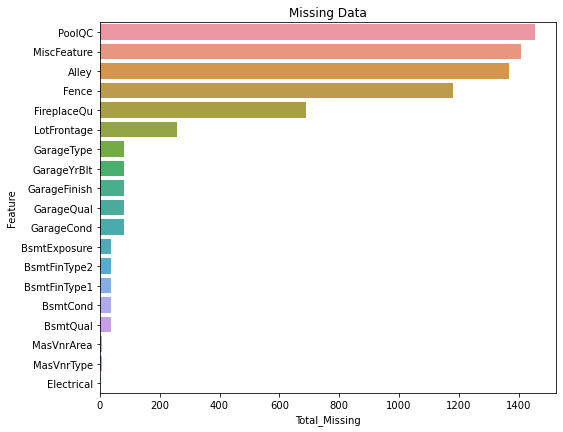

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,15))
plt.subplot(221)
sns.barplot(y='Feature',x='Total_Missing',data=df_missing)
plt.title('Missing Data')

## This dataset has a lot of 'missing' data.

## From reading the description file, some of the predictors have levels coded as "NA" to mean that the predictor isn't there. For example, the predictor "Alley" has a level "NA - No Alley Access". These predictors should have the "NA" values changed to a different string that isn't read as missing. Only one of these predictors is continuous: GarageYrBlt. Two options come to mind for this: converting the "NA" to "0"; or converting the predictor to categorical.

## The LotFrontage predictor is probably the most troublesome, as the data does appear to actually be missing. I'm going to impute the missing values.

## Finally, there are some predictors where "NA" does seem to indicate missing data. I'm going to simply remove these 9 rows from the dataframe as this appears to be the simplest solution.

In [6]:
#Drop 9 Rows With Actual Missing Data
df.dropna(how='any', subset=['Electrical', 'MasVnrArea', 'MasVnrType'], inplace=True)

In [7]:
#Dealing with GarageYrBlt
df['GarageYrBlt'].fillna(0, inplace=True)

In [8]:
report_missing_data(df)

,Feature,Total_Missing,Percent_per_column,Percent_of_total
12,PoolQC,1444.0,99.517574,1.228612
14,MiscFeature,1397.0,96.278429,1.188623
1,Alley,1361.0,93.797381,1.157992
13,Fence,1170.0,80.634045,0.995482
7,FireplaceQu,685.0,47.208822,0.582825
0,LotFrontage,257.0,17.711923,0.218666
8,GarageType,81.0,5.582357,0.068918
9,GarageFinish,81.0,5.582357,0.068918
10,GarageQual,81.0,5.582357,0.068918
11,GarageCond,81.0,5.582357,0.068918


In [9]:
#LotFrontage variable imputation using KNN.
#KNN requires continous predictors, so I'm going to reduce the df to predictors
#that are likely related to LotFrontage. 
df_reduced = df[['LotFrontage', 'LotArea', '1stFlrSF', 'GarageArea', 'SalePrice']]

In [10]:
#Function to select the best value of 'k' based on MAE from RandomForest
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = mean_absolute_error(y_test, preds)
        errors.append({'K': k, 'MAE': error})
        
    return errors

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer

output = optimize_k(df_reduced,'SalePrice')
print(output)

[{'K': 1, 'MAE': 31123.37434298805}, {'K': 3, 'MAE': 31043.331632575137}, {'K': 5, 'MAE': 31745.499035916357}, {'K': 7, 'MAE': 31353.013987617956}, {'K': 9, 'MAE': 31289.92568973982}, {'K': 11, 'MAE': 30951.062272950418}, {'K': 13, 'MAE': 31274.6597114493}, {'K': 15, 'MAE': 31242.78185785196}, {'K': 17, 'MAE': 30901.18606829215}, {'K': 19, 'MAE': 31047.89343778978}]


In [12]:
# Really minimal difference between values of k, but nevertheless I'm going with the lowest mean absolute error.
out = pd.DataFrame(output, columns=['K','MAE'])
position = out['MAE'].idxmin(axis=0)
k = out['K'][position]
print(k)

17


In [13]:
imputer = KNNImputer(n_neighbors=k)
imputed = imputer.fit_transform(df_reduced)
df_imputed = pd.DataFrame(imputed, columns=df_reduced.columns)
df['LotFrontage'] = df_imputed['LotFrontage'].values

In [14]:
#Relabel NA as None for remaining missing data
df = df.where(df.notna(), 'None')
df = df.apply(pd.to_numeric,errors='ignore')

In [15]:
#Final Check to make sure all missing data was caught.
report_missing_data(df)

,Feature,Total_Missing,Percent_per_column,Percent_of_total


## I want to get a feel for which predictors are the most important to include in the analysis.

In [16]:
catCols = [col for col in df.columns if df[col].dtype=="O"]

categorical = df[catCols]
numerical = df.drop(catCols,axis=1)

In [17]:
numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
numerical = numerical.drop('Id', axis=1)

In [19]:
numerical.shape

(1451, 37)

In [20]:
X = numerical.drop('SalePrice', axis=1)
y = numerical['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

model = RandomForestRegressor(random_state=rs)
model.fit(X_train, y_train)
pred = model.predict(X_train)
preds = model.predict(X_test)
print('Train:', mean_absolute_error(y_train, pred))
print('Test:',mean_absolute_error(y_test, preds))

Train: 6679.53749137931
Test: 17836.317250859105


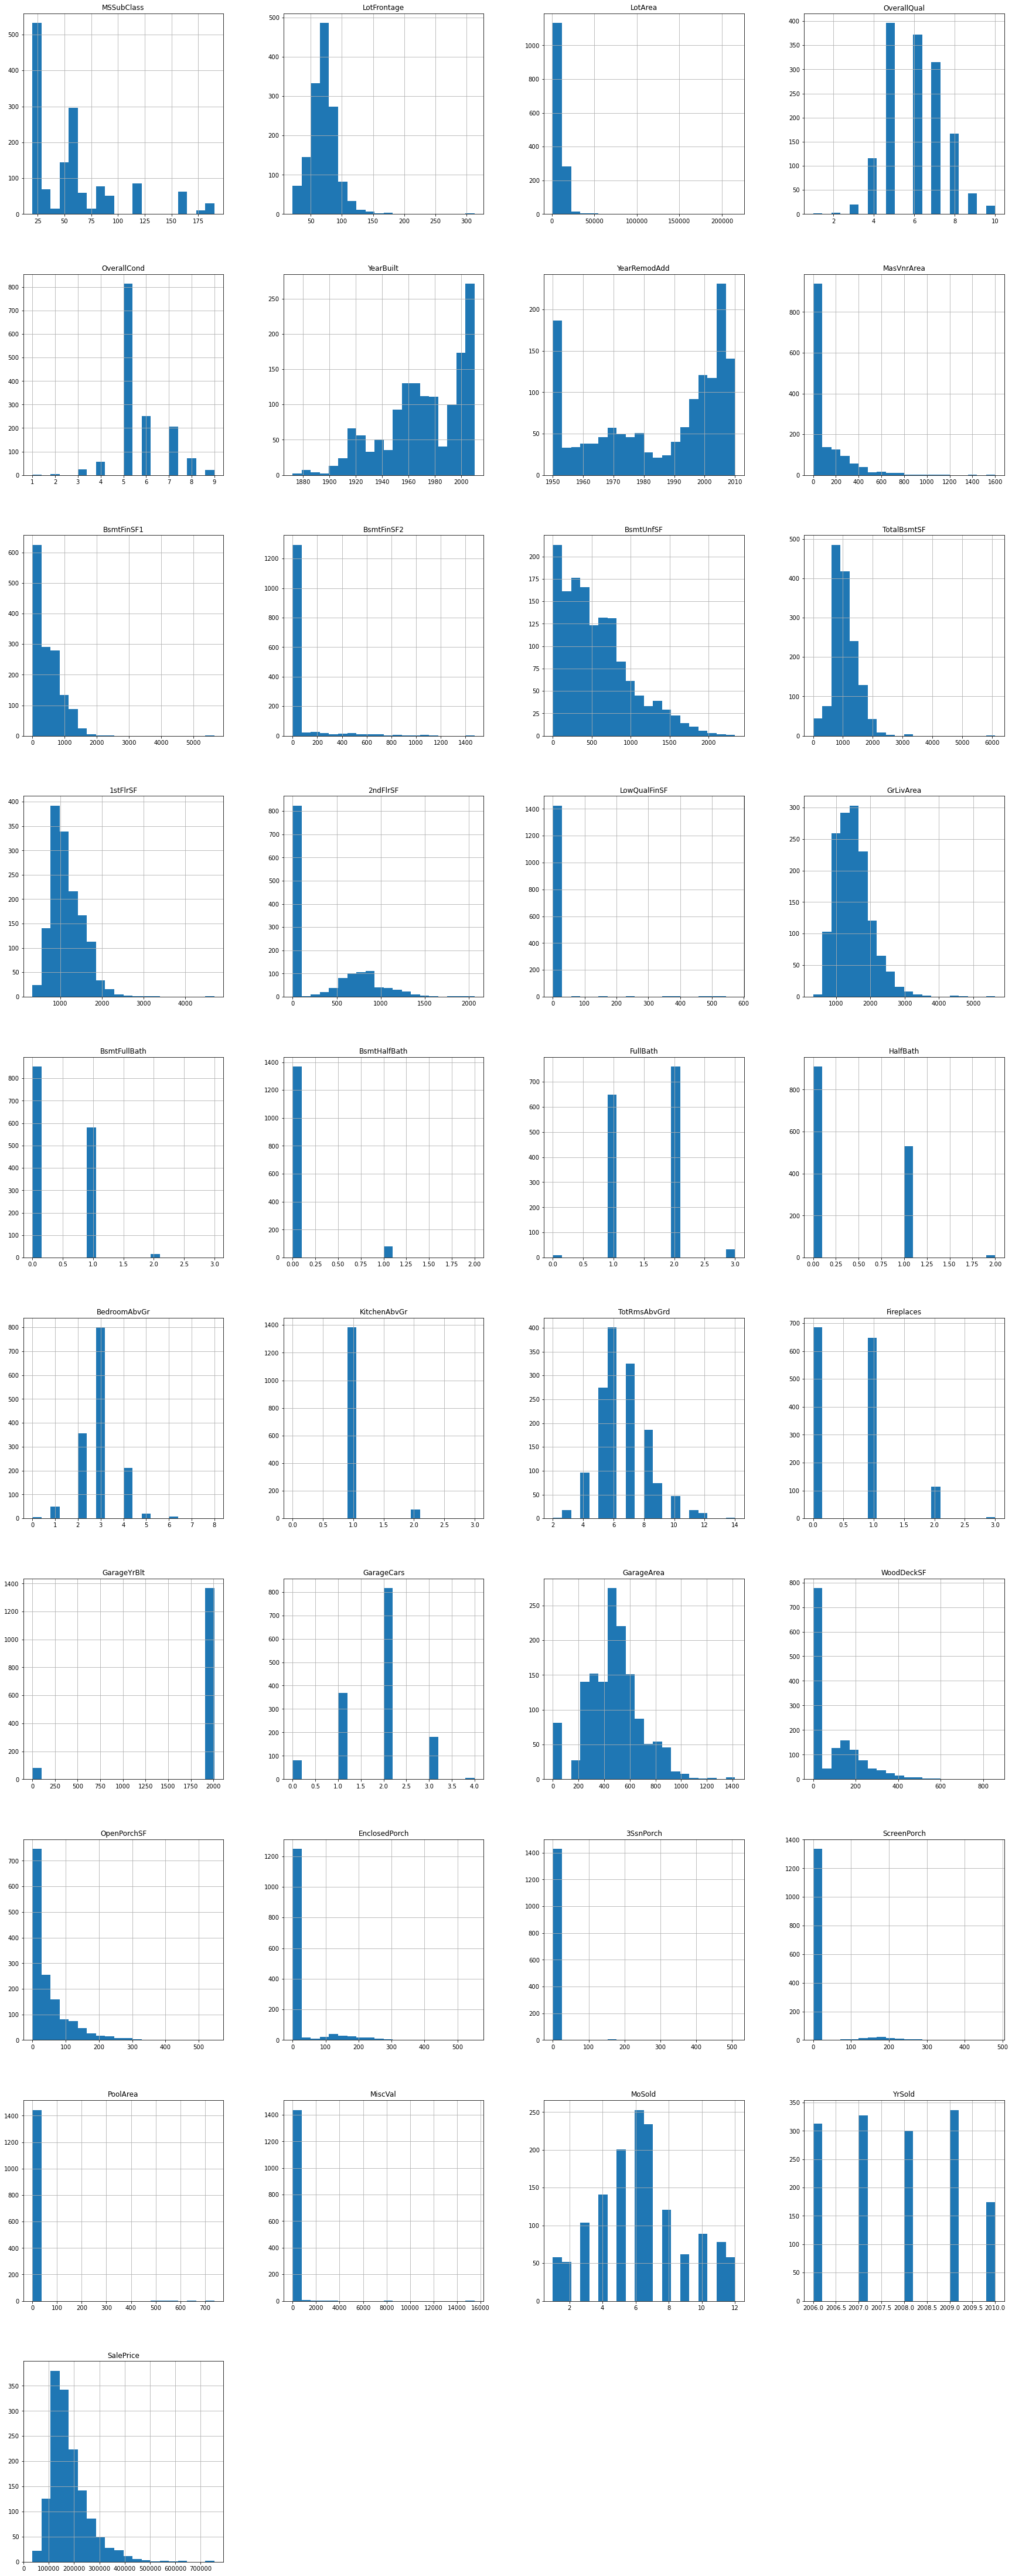

In [21]:
numerical.hist(bins=20, figsize=(30, 80), layout=(10, 4));

## From looking at the plots above, some interesting things to point out:
### Most homes have unfinished basements. Most homes are one story. Most homes do not have Low Quality Finished SF. Most homes have 3 bedrooms. Most homes have 2 bathrooms. Most homes do not have three season porches or screen porches. Most homes do not have pools. Most homes do not have miscellaneous features. Several predictors are skewed right. The response variable is skewed right. (which is expected)

## There are a lot of variables that seem to be mostly 0. These variables don't seem to contribute useful information and shouldn't be used in my models.

In [22]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    if count/1451 > .95:
        print(column_name, ':', count/1451)

LowQualFinSF : 0.9820813232253618
3SsnPorch : 0.983459682977257
PoolArea : 0.9951757408683667
MiscVal : 0.9641626464507237


In [23]:
numerical.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True);

In [24]:
X = numerical.drop('SalePrice', axis=1)
y = numerical['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

model.fit(X_train, y_train)
pred = model.predict(X_train)
preds = model.predict(X_test)
print('Train:', mean_absolute_error(y_train, pred))
print('Test:',mean_absolute_error(y_test, preds))

Train: 6600.856982758622
Test: 17843.702199312713


## Removing predictors with near zero variance.

In [25]:
normalized_df = numerical / numerical.mean()

In [26]:
normalized_df.shape

(1451, 33)

In [27]:
normalized_df.var()

MSSubClass       5.533296e-01
LotFrontage      1.035321e-01
LotArea          9.044121e-01
OverallQual      5.139426e-02
OverallCond      3.982065e-02
YearBuilt        2.345956e-04
YearRemodAdd     1.082630e-04
MasVnrArea       3.046797e+00
BsmtFinSF1       1.060090e+00
BsmtFinSF2       1.192993e+01
BsmtUnfSF        6.078375e-01
TotalBsmtSF      1.718684e-01
1stFlrSF         1.098627e-01
2ndFlrSF         1.584390e+00
GrLivArea        1.205837e-01
BsmtFullBath     1.498491e+00
BsmtHalfBath     1.710816e+01
FullBath         1.240602e-01
HalfBath         1.738943e+00
BedroomAbvGr     8.082667e-02
KitchenAbvGr     4.404934e-02
TotRmsAbvGrd     6.229721e-02
Fireplaces       1.102938e+00
GarageYrBlt      5.932976e-02
GarageCars       1.799551e-01
GarageArea       2.054350e-01
WoodDeckSF       1.765177e+00
OpenPorchSF      2.024989e+00
EnclosedPorch    7.748782e+00
ScreenPorch      1.361506e+01
MoSold           1.826131e-01
YrSold           4.383777e-07
SalePrice        1.928092e-01
dtype: flo

In [28]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.003)
_ = vt.fit(normalized_df)
mask = vt.get_support()
numerical = numerical.loc[:, mask]

In [29]:
numerical.shape

(1451, 30)

In [30]:
X = numerical.drop('SalePrice', axis=1)
y = numerical['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

model.fit(X_train, y_train)
pred = model.predict(X_train)
preds = model.predict(X_test)
print('Train:', mean_absolute_error(y_train, pred))
print('Test:',mean_absolute_error(y_test, preds))

Train: 6797.650586206896
Test: 18034.26288659794


## Next I'm going to look at the categorical variables

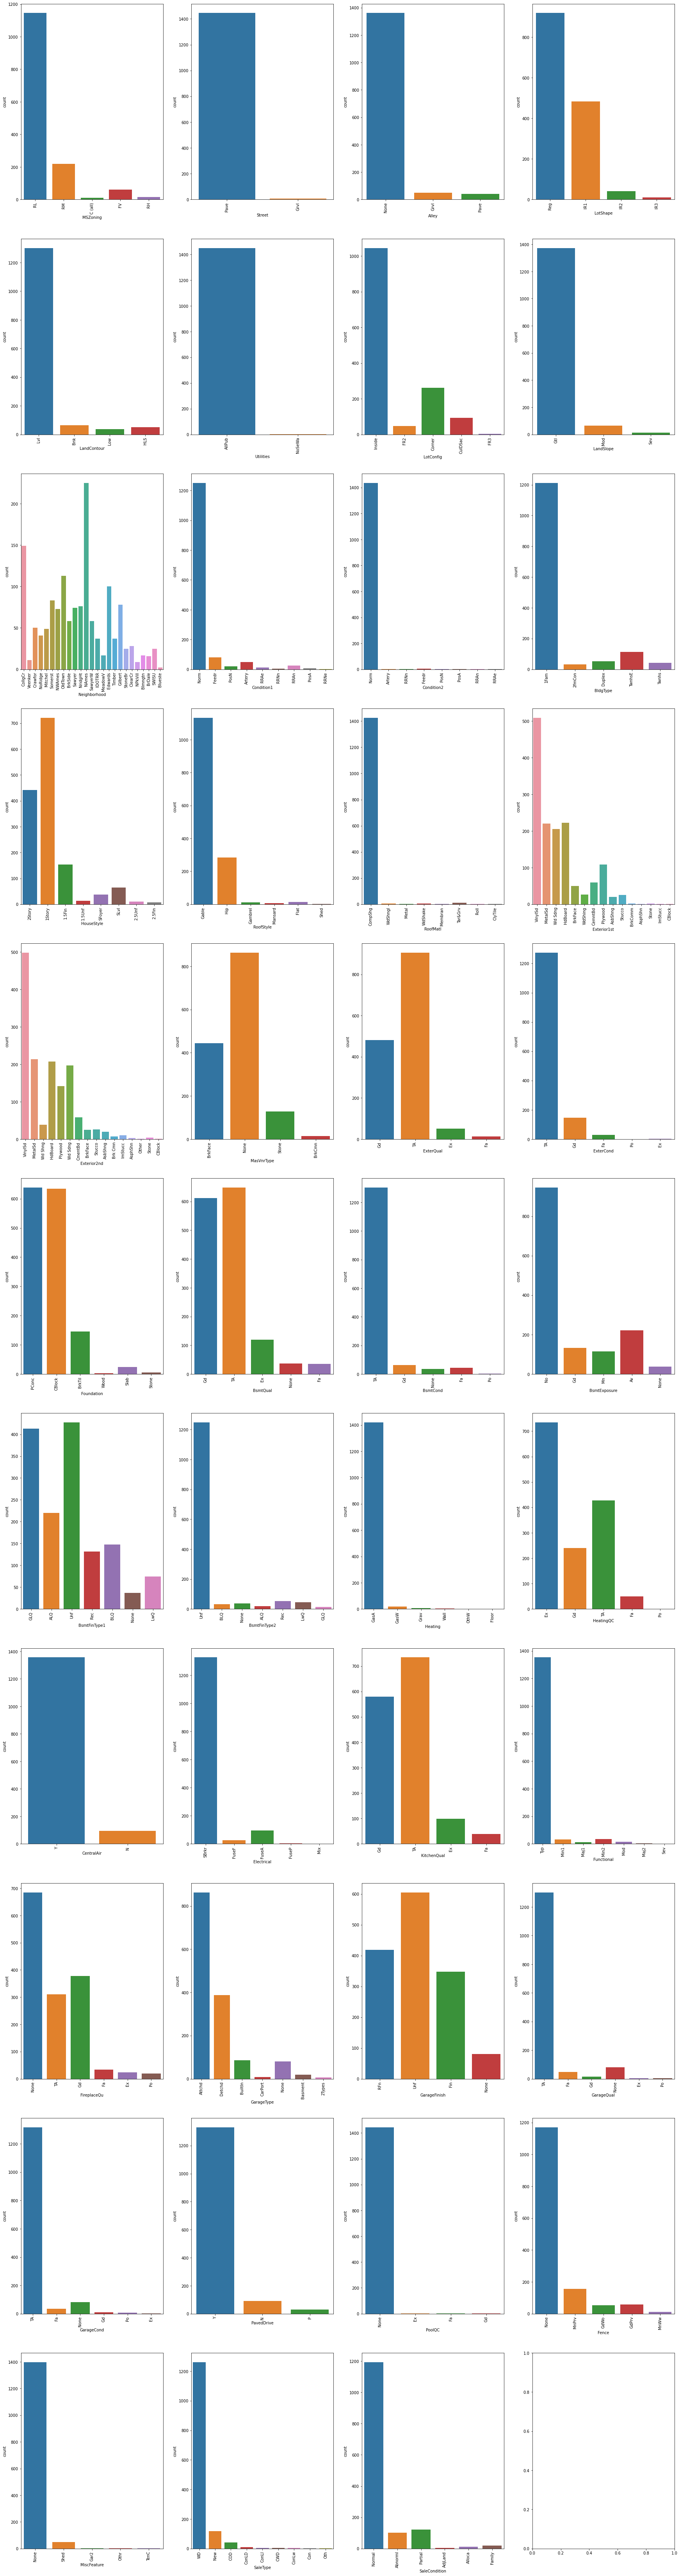

In [31]:
fig, ax = plt.subplots(11, 4, figsize=(30, 120))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Many of these predictors appear to have very little variation. It may be helpful to look at how they vary based on the response.

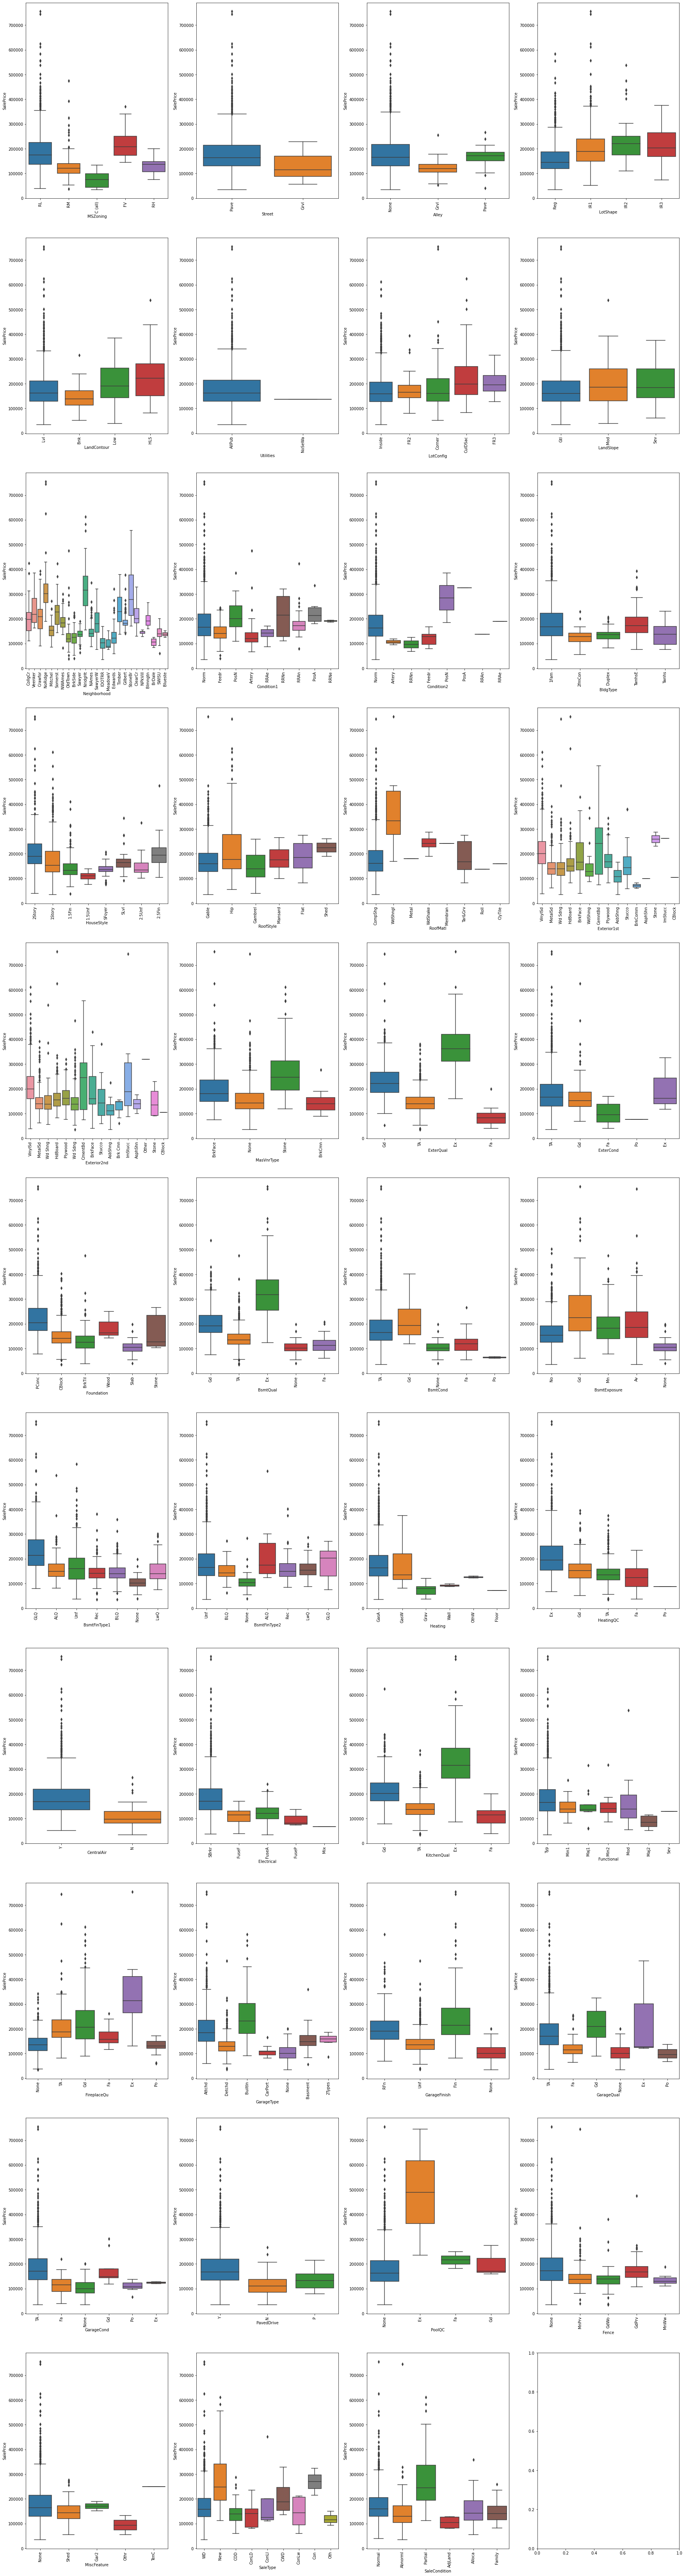

In [32]:
fig, ax = plt.subplots(11, 4, figsize=(30, 120))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Many of the Categorical Variables appear to provide useful information for determining SalePrice.
## I'm going to begin by including the predictors that appear to have the most variation between their levels:
### Neighborhood, CentralAir, RoofMatl, PoolQC, ExterQual, Street

## Dummy Variable Encoding

In [33]:
keep = ['Neighborhood', 'CentralAir', 'RoofMatl', 'PoolQC', 'ExterQual', 'Street']
cat_dummies = pd.get_dummies(categorical[keep], drop_first=True)
df_final = pd.concat([numerical, cat_dummies], axis=1)

## Correlation Analysis

In [34]:
N = df_final.select_dtypes('number').copy()
c = et.corrtable(N, cut = 0.5, full= True, methodx = 'pearson')

In [35]:
target = c.loc[c['drop'] == 'SalePrice']
print(target)

                v1            v2  v1.target  v2.target      corr       drop
226    OverallQual     SalePrice   0.210303   0.226812  0.790085  SalePrice
766      GrLivArea     SalePrice   0.207256   0.226812  0.710073  SalePrice
1271    GarageCars     SalePrice   0.190568   0.226812  0.639749  SalePrice
1316    GarageArea     SalePrice   0.186450   0.226812  0.622484  SalePrice
595    TotalBsmtSF     SalePrice   0.187087   0.226812  0.613299  SalePrice
653       1stFlrSF     SalePrice   0.190151   0.226812  0.606969  SalePrice
1603     SalePrice  ExterQual_TA   0.226812   0.178797  0.589583  SalePrice
928       FullBath     SalePrice   0.178113   0.226812  0.562710  SalePrice
1130  TotRmsAbvGrd     SalePrice   0.167661   0.226812  0.536366  SalePrice


## The above predictors have a relatively high (>.5) correlation with the response variable. These predictors seem like good inclusions in the final model. Multicollinearity is not a huge issue for prediction with Decision Trees / Random Forest, so I'm not overly concerned about removing the highly correlated predictors.

## Separate Predictors / Response

In [36]:
Y = df_final.SalePrice
X = df_final.drop('SalePrice', axis=1)

In [37]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=rs)

## Initial Decision Tree Investigation with minimal parameter tuning

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=rs)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

for max_leaf_nodes in [30,40,50,60,70,80,90,100,200,]:
    my_mae = get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 30  		 Mean Absolute Error:  26367
Max leaf nodes: 40  		 Mean Absolute Error:  26780
Max leaf nodes: 50  		 Mean Absolute Error:  26292
Max leaf nodes: 60  		 Mean Absolute Error:  25341
Max leaf nodes: 70  		 Mean Absolute Error:  26034
Max leaf nodes: 80  		 Mean Absolute Error:  25977
Max leaf nodes: 90  		 Mean Absolute Error:  26127
Max leaf nodes: 100  		 Mean Absolute Error:  26389
Max leaf nodes: 200  		 Mean Absolute Error:  27564


In [39]:
dt_model = DecisionTreeRegressor(max_leaf_nodes=60, random_state=rs)
dt_model.fit(train_x, train_y)
test_pred = dt_model.predict(test_x)
train_pred = dt_model.predict(train_x)

dttmae = mean_absolute_error(train_y, train_pred)
print('Train Performance:', dttmae)
dtmae = mean_absolute_error(test_y, test_pred)
print('Test Performance:', dtmae)

Train Performance: 15378.201537680234
Test Performance: 25341.248359123376


## Initial Random Forest Investigation

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=rs)
forest_model.fit(train_x, train_y)
test_pred2 = forest_model.predict(test_x)

rfmae = mean_absolute_error(test_y, test_pred2)
print('Test Performance:', rfmae)

Test Performance: 18922.6675


## Both of these models appear to be overfitting to the training set. I'm going to try to tune the performance by adjusting parameters in the model. Exploring alternative predictor lists would be another way to possibly improve performance.

## Tuning Decision Tree

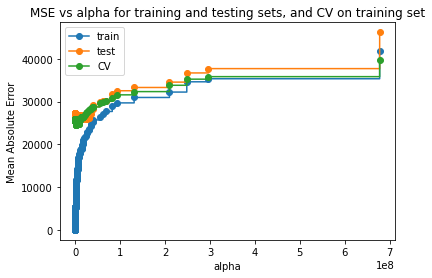

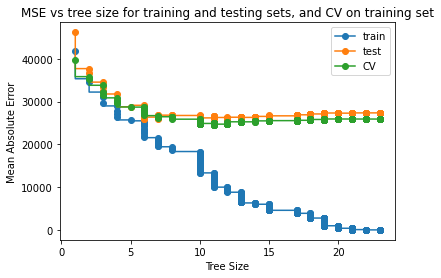

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

df_dtr = DecisionTreeRegressor(random_state=rs)
df_dtr = df_dtr.fit(train_x, train_y)

path = df_dtr.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #remove max value of alpha
regrs = []
for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=rs, ccp_alpha=ccp_alpha)
    regr.fit(train_x, train_y)
    regrs.append(regr)
    
train_scores = [mean_absolute_error(train_y, regr.predict(train_x)) for regr in regrs]
test_scores =  [mean_absolute_error(test_y, regr.predict(test_x)) for regr in regrs]
cv_scores = [-cross_val_score(regr, train_x, train_y, cv=10, scoring='neg_mean_absolute_error').mean() for regr in regrs]

# MAE vs alpha plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("MSE vs alpha for training and testing sets, and CV on training set")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.plot(ccp_alphas, cv_scores, marker = 'o', label = "CV", drawstyle = "steps-post")
ax.legend()
plt.show()

# MAE vs tree size plot
depth = [regr.tree_.max_depth for regr in regrs]
fig, ax = plt.subplots()
ax.set_xlabel("Tree Size")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("MSE vs tree size for training and testing sets, and CV on training set")
ax.plot(depth, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(depth, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.plot(depth, cv_scores, marker = 'o', label = "CV", drawstyle = "steps-post")
ax.legend()
plt.show()

## alpha appears to offer worse performance as it increases. Optimal value between 0 and 1000000.
## depth appears to offer better performance as it increases. Optimal value levels out after tree size of 6. Afterwards, overfitting occurs.

In [43]:
from sklearn.model_selection import GridSearchCV

def dto_model(X, y):
    gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(random_state=rs),
        param_grid={
            'ccp_alpha':[1,1000000,2000000,5000000,10000000,20000000,50000000],
            'max_depth': range(2,9),
            'min_samples_leaf': range(1,5),
            'min_weight_fraction_leaf': [0.1,0.2,0.3,0.4,0.5],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90,100]
        },
        cv=5, scoring='neg_mean_absolute_error', verbose=3, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    dtr = DecisionTreeRegressor(ccp_alpha=best_params["ccp_alpha"], 
                                max_depth=best_params["max_depth"],
                                min_samples_leaf=best_params["min_samples_leaf"], 
                                min_weight_fraction_leaf=best_params["min_weight_fraction_leaf"],
                                max_leaf_nodes=best_params["max_leaf_nodes"], 
                                random_state=rs)
    scores = cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return best_params,scores

dto_model(train_x,train_y)

Fitting 5 folds for each of 10780 candidates, totalling 53900 fits


({'ccp_alpha': 1,
  'max_depth': 5,
  'max_leaf_nodes': None,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.1},
 array([-32081.5164477 , -31945.0309241 , -30976.22751059, -31609.92270827,
        -29767.07823739, -30236.02612102, -32804.19939052, -28150.86150824,
        -29587.52518042, -32514.5328457 ]))

In [44]:
tuned_dt_model= DecisionTreeRegressor(ccp_alpha=1,max_depth=5,max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,random_state=rs)
tuned_dt_model.fit(train_x,train_y)
test_pred = tuned_dt_model.predict(test_x)
train_pred = tuned_dt_model.predict(train_x)

trdtmae = mean_absolute_error(train_y, train_pred)
print('Training:',trdtmae)
tedtmae = mean_absolute_error(test_y, test_pred)
print('Testing:',tedtmae)

Training: 29432.141280814307
Testing: 32252.492102345263


## Performance appears to be slightly worse compared to without tuning, but the overfitting seems to have been mostly eliminated.

## Random Forest hypertuning

## Create a random grid of parameters to explore and use RandomizedSearchCV to explore random combinations from the grid to try to pin down which parameters are most important. Searching randomly saves time vs having the model run with all combinations. Finally, use GridSearchCV to search all combinations in the refined grid to determine optimal parameters.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [46]:
rf = RandomForestRegressor(random_state=rs)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=rs, n_jobs = -1)
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=33),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=33, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [48]:
param_grid = {'bootstrap': [False],
              'max_depth': [40, 50, 60],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 5],
              'n_estimators': [1400, 1600, 1800]}
rf = RandomForestRegressor(random_state=rs)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_x, train_y)
rfparam = grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [52]:
bestrf = RandomForestRegressor(bootstrap=rfparam["bootstrap"],
                               max_depth=rfparam["max_depth"],
                               max_features=rfparam["max_features"],
                               min_samples_leaf=rfparam["min_samples_leaf"], 
                               min_samples_split=rfparam["min_samples_split"],
                               n_estimators=rfparam["n_estimators"],
                               random_state=rs)

bestrf.fit(train_x, train_y)
test_pred2 = bestrf.predict(test_x)

rfmae = mean_absolute_error(test_y, test_pred2)
print('Test Performance:', rfmae)

Test Performance: 18729.30844036697


## After tuning, RF MAE improved by ~$200